In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy import optimize
from scipy.spatial import distance_matrix

In [7]:
def remove_close_points(points, min_distance=0.1):
    """
    Remove points that are very close to each other from a NumPy array.
    
    Parameters:
    -----------
    points : numpy.ndarray
        Input array of points with shape (n, 2) or (n, 3)
    min_distance : float, optional
        Minimum distance between points to keep. Points closer than 
        this will be removed. Default is 0.1.
    
    Returns:
    --------
    numpy.ndarray
        Filtered array of points with closely spaced points removed
    """
    # Validate input
    points = np.asarray(points)
    if points.ndim != 2 or points.shape[1] not in [2, 3]:
        raise ValueError("Input must be a 2D array with 2 or 3 columns")
    
    # If no points or single point, return as is
    if len(points) <= 1:
        return points
    
    # Compute distance matrix
    dist_matrix = distance_matrix(points, points)
    
    # Create a mask to keep points
    keep_mask = np.ones(len(points), dtype=bool)
    
    for i in range(len(points)):
        if not keep_mask[i]:
            continue
        
        # Find points close to the current point
        close_points = np.where((dist_matrix[i] < min_distance) & (dist_matrix[i] > 0))[0]
        
        # Mark close points to be removed
        keep_mask[close_points] = False
    
    # Return filtered points
    return points[keep_mask]

In [10]:
df1 = pd.read_csv('dataframes_pos_uncertainty/1_3_15_0_0.csv')
df2 = pd.read_csv('dataframes_pos_uncertainty/1_3_15_44_0.csv')

(-3.4602649077183, 3.4353822855745273, 17.02355158000024, 23.91919877329307)

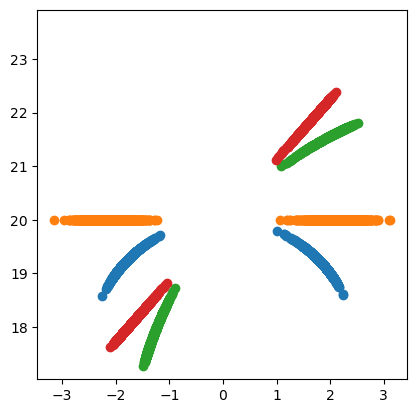

In [19]:
plt.scatter(df1['vy_vo'], df1['vx_vo'])
plt.scatter(df1['vy_mvp'], df1['vx_mvp'])

plt.scatter(df2['vy_vo'], df2['vx_vo'])
plt.scatter(df2['vy_mvp'], df2['vx_mvp'])
plt.axis('square')

In [20]:
X_mvp_0 = np.array(df1[['vx_mvp', 'vy_mvp']])
X_vo_0 = np.array(df1[['vx_vo', 'vy_vo']])

X_vo_44 = np.array(df2[['vx_vo', 'vy_vo']])
X_vo_44 = np.array(df2[['vx_vo', 'vy_vo']])

filtered_points1 = remove_close_points(X_vo_0, min_distance=0.5)
filtered_points2 = remove_close_points(X_vo_44, min_distance=0.5)

(-2.320974235037725, 2.362386172051589, 18.73424677918729, 23.417607186276605)

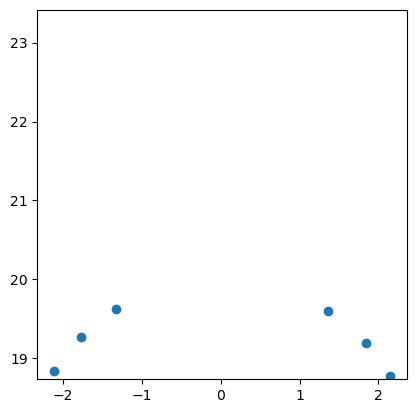

In [24]:
plt.scatter(filtered_points1[:, 1], filtered_points1[:, 0])
plt.axis('square')

In [27]:
import numpy as np
from scipy import optimize

def leastsq_circle_fit(points):
    """
    Least squares circle fitting method
    
    Args:
    points (np.ndarray): Array of (x, y) coordinates
    
    Returns:
    tuple: (center_x, center_y, radius)
    """
    def calc_R(xc, yc):
        """ Calculate the distance of each point from center (xc, yc) """
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2)
    
    def f(c):
        """ Compute algebraic distance between the data points and the mean circle centered at c """
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    
    # Initial guess (centroid)
    center_estimate = np.mean(points, axis=0)
    
    # Optimize to find center
    center, _ = optimize.leastsq(f, center_estimate)
    
    # Calculate radius
    radius = calc_R(*center).mean()
    
    return center[0], center[1], radius

In [29]:
print("\nLeast Squares Circle Fit:")
ls_center_x, ls_center_y, ls_radius = leastsq_circle_fit(filtered_points1)
print(f"Center: ({ls_center_x:.4f}, {ls_center_y:.4f}), Radius: {ls_radius:.4f}")

print("\nLeast Squares Circle Fit:")
ls_center_x, ls_center_y, ls_radius = leastsq_circle_fit(filtered_points2)
print(f"Center: ({ls_center_x:.4f}, {ls_center_y:.4f}), Radius: {ls_radius:.4f}")


Least Squares Circle Fit:
Center: (17.5000, 0.0000), Radius: 2.5000

Least Squares Circle Fit:
Center: (15.3950, 5.2099), Radius: 6.9533


In [52]:
gs_int = 5
gs_own = 20

hdg_int = 0
hdg_own = 0

vx_int = gs_int * np.cos(np.deg2rad(hdg_int))
vy_int = gs_int * np.sin(np.deg2rad(hdg_int))

vx_own = gs_own * np.cos(np.deg2rad(hdg_own))
vy_own = gs_own * np.sin(np.deg2rad(hdg_own))

radius = np.sqrt((vx_own - vx_int)**2 + (vy_own - vy_int)**2)/2

print(radius)

7.5
